<a href="https://colab.research.google.com/github/weiyunna/Data-Visualization/blob/master/Matplotlib_Basci_Usage_Patterns_and_Best_Practices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matplotlib-Basci Usage Patterns and Best-Practices

This tutorial covers some basic usage patterns and best-practices to help you get started with Matplotlib.

## General Concepts

**matplotlib** has an extensive codebase that can be daunting to many new users. However, most of matplotlib can be understood with a fairly simple conceptual framework and knowledge of a few important points.

Plotting requires action on a range of levels, from the most general (e.g., 'contour this 2-D array') to the most specific (e.g., 'color this screen pixel red'). The purpose of a plotting package is to assist you in visualizing your data as easily as possible, with all the necessary control -- that is, by using relatively high-level commands most of the time, and still have the ability to use the low-level commands when needed.

Therefore, everything in matplotlib is organized in a **hierarchy**.

* At the top of the hierarchy is the matplotlib "state-machine environment" which is provided by the** matplotlib.pyplot** module. At this level, simple functions are used to add plot elements (lines, images, text, etc.) to the current axes in the current figure.

* The next level down in the hierarchy is the first level of the **object-oriented interface,** in which pyplot is used only for a few functions such as figure creation, and the user explicitly creates and keeps track of the figure and axes objects. At this level, the user uses pyplot to create figures, and through those figures, one or more axes objects can be created. These axes objects are then used for most plotting actions.

* For even more control -- which is essential for things like embedding matplotlib plots in **GUI applications** -- the pyplot level may be dropped completely, leaving a purely object-oriented approach.

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Parts of A Figure

### Figure

The whole figure. The figure keeps track of all the child Axes, a smattering of 'special' artists (titles, figure legends, etc), and the canvas. (Don't worry too much about the canvas, it is crucial as it is the object that actually does the drawing to get you your plot, but as the user it is more-or-less invisible to you). A figure can have any number of Axes, but to be useful should have at least one.

The easiest way to create a new figure is with pyplot:

<Figure size 576x396 with 0 Axes>

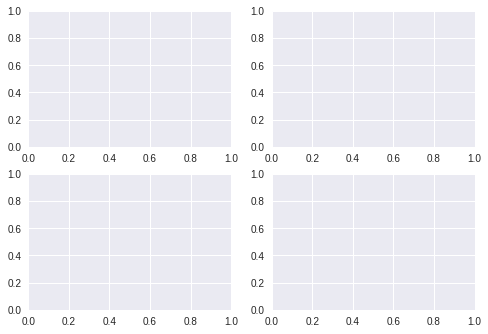

In [2]:
fig = plt.figure()  # an empty figure with no axes
fig.suptitle('No axes on this figure')  # Add a title so we know which it is

fig, ax_lst = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes

### Axes

This is what you think of as 'a plot', it is the region of the image with the data space. 

* A given figure can contain many Axes, but a given Axes object can only be in one Figure. 

* The Axes contains two (or three in the case of 3D) Axis objects (be aware of the difference between Axes and Axis) which take care of the data limits (the data limits can also be controlled via set via the set_xlim() and set_ylim() Axes methods). 

* Each Axes has a title (set via set_title()), an x-label (set via set_xlabel()), and a y-label set via set_ylabel()).

The Axes class and it's member functions are the primary entry point to working with the OO interface.

### Axis

These are the number-line-like objects. 

* They take care of setting the graph limits and generating the ticks (the marks on the axis) and ticklabels (strings labeling the ticks). 

* The location of the ticks is determined by a Locator object and the ticklabel strings are formatted by a Formatter. 

* The combination of the correct Locator and Formatter gives very fine control over the tick locations and labels.

### Artist

Basically everything you can see on the figure is an artist (even the Figure, Axes, and Axis objects). 

This includes Text objects, Line2D objects, collection objects, Patch objects ... (you get the idea). 

When the figure is rendered, all of the artists are drawn to the canvas. 

Most Artists are tied to an Axes; such an Artist cannot be shared by multiple Axes, or moved from one to another.

## Types of inputs to plotting functions

All of plotting functions expect **np.array** or **np.ma.masked_array** as input. 

Classes that are 'array-like' such as **pandas data objects** and **np.matrix** may or may not work as intended. It is best to convert these to np.array objects prior to plotting.

For example, to convert a pandas.DataFrame

In [7]:
a = pd.DataFrame(np.random.rand(4,5), columns = list('abcde'))
a_asndarray = a.values
a_asndarray

array([[0.34222397, 0.13599425, 0.53054603, 0.82913234, 0.73431051],
       [0.47140733, 0.78549327, 0.4657827 , 0.1473247 , 0.4063365 ],
       [0.13348971, 0.90784365, 0.82498974, 0.05822078, 0.96357592],
       [0.85686013, 0.72091698, 0.49909311, 0.19374389, 0.91165524]])

In [8]:
a

,a,b,c,d,e
0,0.342224,0.135994,0.530546,0.829132,0.734311
1,0.471407,0.785493,0.465783,0.147325,0.406336
2,0.133490,0.907844,0.824990,0.058221,0.963576
3,0.856860,0.720917,0.499093,0.193744,0.911655


and to covert a np.matrix

In [0]:
b = np.matrix([[1,2],[3,4]])
b_asarray = np.asarray(b)

In [10]:
b

matrix([[1, 2],
        [3, 4]])

In [11]:
b_asarray

array([[1, 2],
       [3, 4]])

## Matplotlib, pyplot and pylab: how are they related?

Matplotlib is the whole package; **matplotlib.pyplot **is a module in matplotlib; and **pylab** is a module that gets installed alongside matplotlib.

Pyplot provides the** state-machine interface **to the underlying **object-oriented plotting** library. The state-machine implicitly and automatically creates figures and axes to achieve the desired plot. For example:

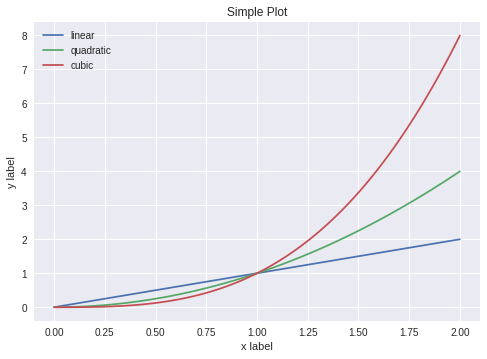

In [12]:
x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')

plt.xlabel('x label')
plt.ylabel('y label')

plt.title("Simple Plot")

plt.legend()

plt.show()

In [13]:
x

array([0.        , 0.02020202, 0.04040404, 0.06060606, 0.08080808,
       0.1010101 , 0.12121212, 0.14141414, 0.16161616, 0.18181818,
       0.2020202 , 0.22222222, 0.24242424, 0.26262626, 0.28282828,
       0.3030303 , 0.32323232, 0.34343434, 0.36363636, 0.38383838,
       0.4040404 , 0.42424242, 0.44444444, 0.46464646, 0.48484848,
       0.50505051, 0.52525253, 0.54545455, 0.56565657, 0.58585859,
       0.60606061, 0.62626263, 0.64646465, 0.66666667, 0.68686869,
       0.70707071, 0.72727273, 0.74747475, 0.76767677, 0.78787879,
       0.80808081, 0.82828283, 0.84848485, 0.86868687, 0.88888889,
       0.90909091, 0.92929293, 0.94949495, 0.96969697, 0.98989899,
       1.01010101, 1.03030303, 1.05050505, 1.07070707, 1.09090909,
       1.11111111, 1.13131313, 1.15151515, 1.17171717, 1.19191919,
       1.21212121, 1.23232323, 1.25252525, 1.27272727, 1.29292929,
       1.31313131, 1.33333333, 1.35353535, 1.37373737, 1.39393939,
       1.41414141, 1.43434343, 1.45454545, 1.47474747, 1.49494

The first call to plt.plot will automatically create the necessary figure and axes to achieve the desired plot. Subsequent calls to plt.plot re-use the current axes and each add another line. Setting the title, legend, and axis labels also automatically use the current axes and set the title, create the legend, and label the axis respectively.

pylab is a convenience module that bulk imports matplotlib.pyplot (for plotting) and numpy (for mathematics and working with arrays) in a single name space. pylab is deprecated and its use is strongly discouraged because of namespace pollution. Use pyplot instead.

For non-interactive plotting it is suggested to use pyplot to create the figures and then the OO interface for plotting.

### Coding Style

When viewing this documentation and examples, you will find different coding styles and usage patterns. These styles are perfectly valid and have their pros and cons. Just about all of the examples can be converted into another style and achieve the same results. The only caveat is to avoid mixing the coding styles for your own code.

Of the different styles, there are two that are officially supported. Therefore, these are the preferred ways to use matplotlib.

For the pyplot style, the imports at the top of your scripts will typically be:

In [0]:
import matplotlib.pyplot as plt
import numpy as np

Then one calls, for example, np.arange, np.zeros, np.pi, plt.figure, plt.plot, plt.show, etc. Use the pyplot interface for creating figures, and then use the object methods for the rest:

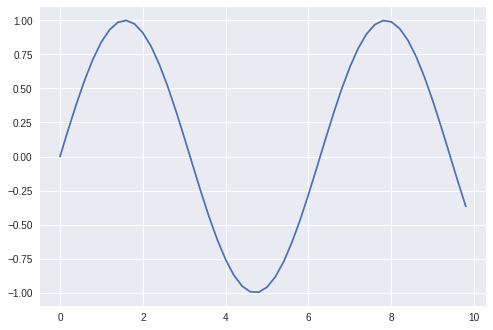

In [15]:
x = np.arange(0, 10, 0.2)
y = np.sin(x)
fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

So, why all the extra typing instead of the MATLAB-style (which relies on global state and a flat namespace)? For very simple things like this example, the only advantage is academic: the wordier styles are more explicit, more clear as to where things come from and what is going on. For more complicated applications, this explicitness and clarity becomes increasingly valuable, and the richer and more complete object-oriented interface will likely make the program easier to write and maintain.

Typically one finds oneself making the same plots over and over again, but with different data sets, which leads to needing to write specialized functions to do the plotting. The recommended function signature is something like:

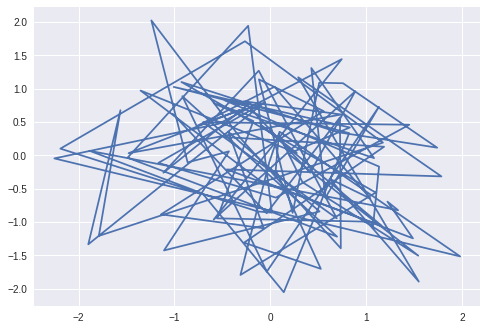

In [16]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

# which you would then use as:

data1, data2, data3, data4 = np.random.randn(4, 100)
fig, ax = plt.subplots(1, 1)
my_plotter(ax, data1, data2, {'marker': 'x'})

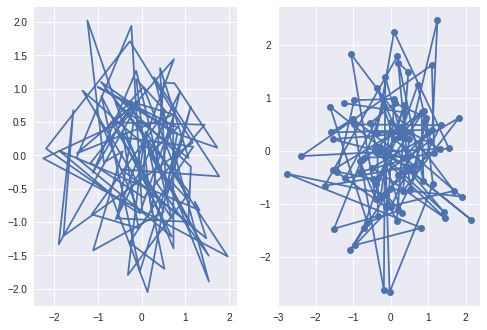

In [18]:
# or if you wanted to have 2 sub-plots:
fig, (ax1, ax2) = plt.subplots(1, 2)
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'})

Again, for these simple examples this style seems like overkill, however once the graphs get slightly more complex it pays off.

## Backends

### What is Backend?

A lot of documentation on the website and in the mailing lists refers to the "backend" and many new users are confused by this term. 

matplotlib targets many different use cases and output formats. 
* Some people use matplotlib interactively from the python shell and have plotting windows pop up when they type commands. 
* Some people run Jupyter notebooks and draw inline plots for quick data analysis. 
* Others embed matplotlib into graphical user interfaces like wxpython or pygtk to build rich applications. 
* Some people use matplotlib in batch scripts to generate postscript images from numerical simulations, 
* and still others run web application servers to dynamically serve up graphs.

To support all of these use cases, matplotlib can target different outputs, and each of these capabilities is called a backend; 

* the "frontend" is the user facing code, i.e., the plotting code, 
* whereas the "backend" does all the hard work behind-the-scenes to make the figure. 

There are two types of backends: 

* user interface backends (for use in pygtk, wxpython, tkinter, qt4, or macosx; also referred to as "interactive backends") 

* and hardcopy backends to make image files (PNG, SVG, PDF, PS; also referred to as "non-interactive backends").